In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [1]:
# 匯入
import requests
import io

# 取得資料
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

In [4]:
# 將取得的資料作為DataFrame物件讀取
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header = None)

# 在資料裡設定標籤
mushroom.columns = ['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
                    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
                    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

In [5]:
mushroom.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
print("資料的形式：{}".format(mushroom.shape))
print("missing的數量：{}".format(mushroom.isnull().sum().sum()))

資料的形式：(8124, 23)
missing的數量：0


In [7]:
# 設定dummy variables
mushroom_dummy = pd.get_dummies(mushroom.iloc[:,range(1,23)])
mushroom_dummy.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# 目標變數0/1化
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.tree as tree

In [10]:
# 資料分割
X = mushroom_dummy.drop('flg', axis = 1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [11]:
# 決策樹類別的初始化與學習
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [12]:
print("準確度(train):{:.3f}".format(model.score(X_train, y_train)))
print("準確度(test):{:.3f}".format(model.score(X_test, y_test)))

準確度(train):0.999
準確度(test):1.000


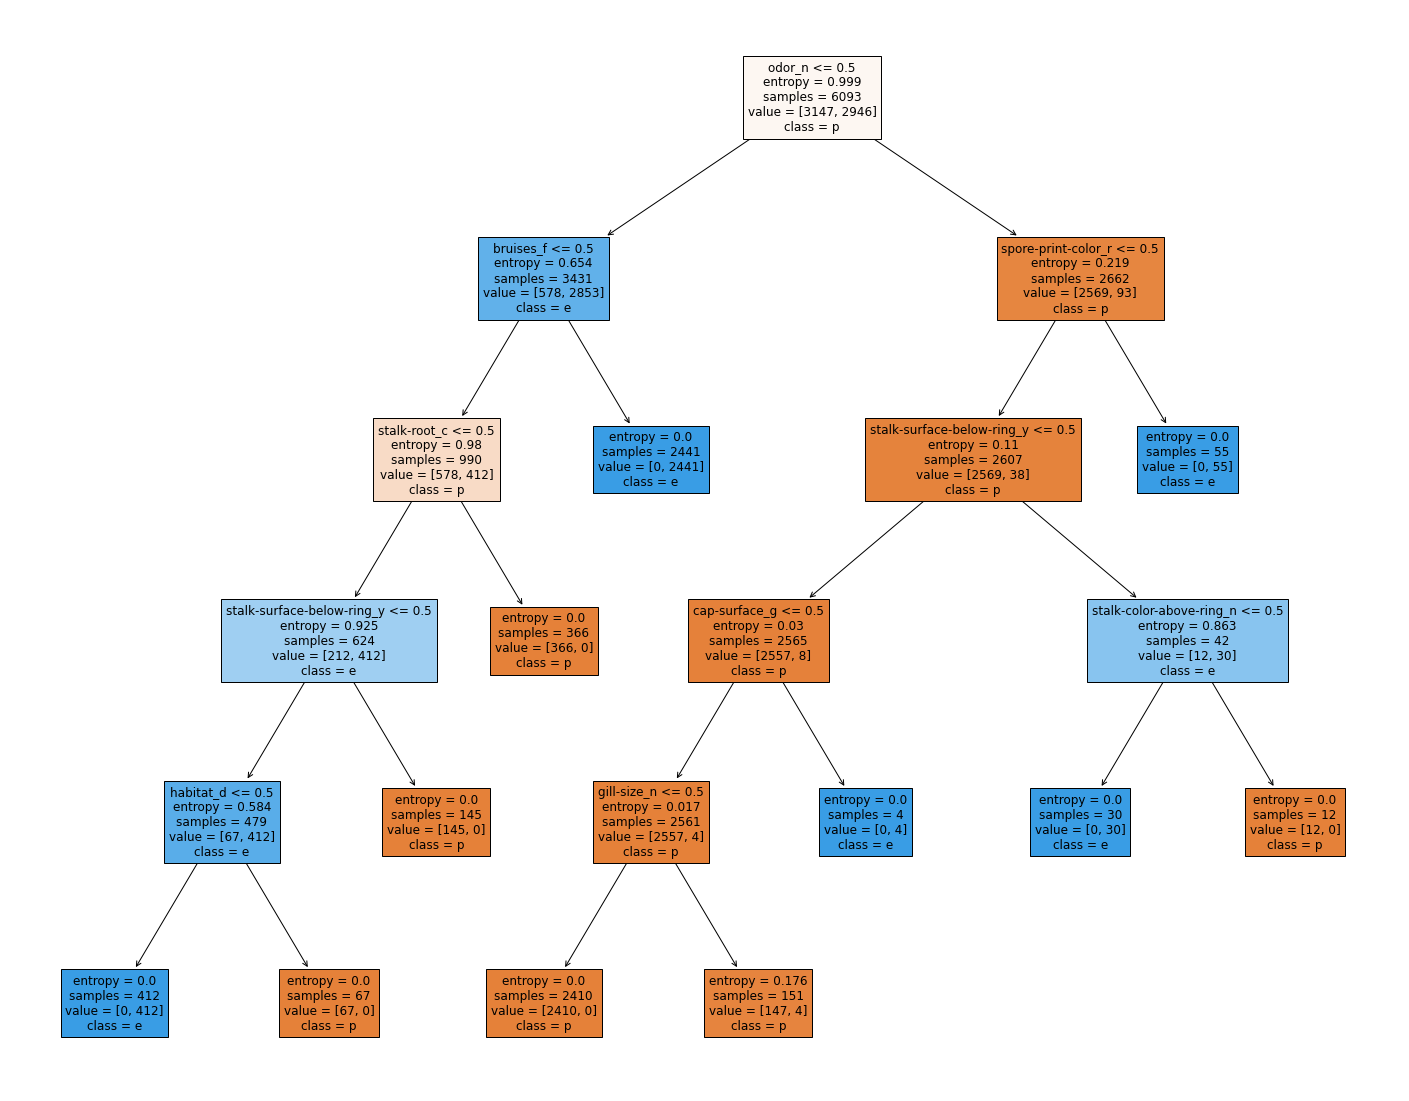

In [17]:
# Plot Classification Tree
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(model, feature_names = X_train.columns, class_names = mushroom.classes, filled = True)

In [48]:
from sklearn import datasets

In [49]:
cancer = datasets.load_breast_cancer()

In [50]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [51]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [52]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [53]:
df_cancer = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
t = pd.DataFrame(cancer['target'], columns=['target_names'])
t

,target_names
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [57]:
data = pd.concat([df_cancer,t], axis=1)
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [58]:
# 資料分割
X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [59]:
# 決策樹類別的初始化與學習
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [60]:
print("準確度(train):{:.3f}".format(model.score(X_train, y_train)))
print("準確度(test):{:.3f}".format(model.score(X_test, y_test)))

準確度(train):0.993
準確度(test):0.944


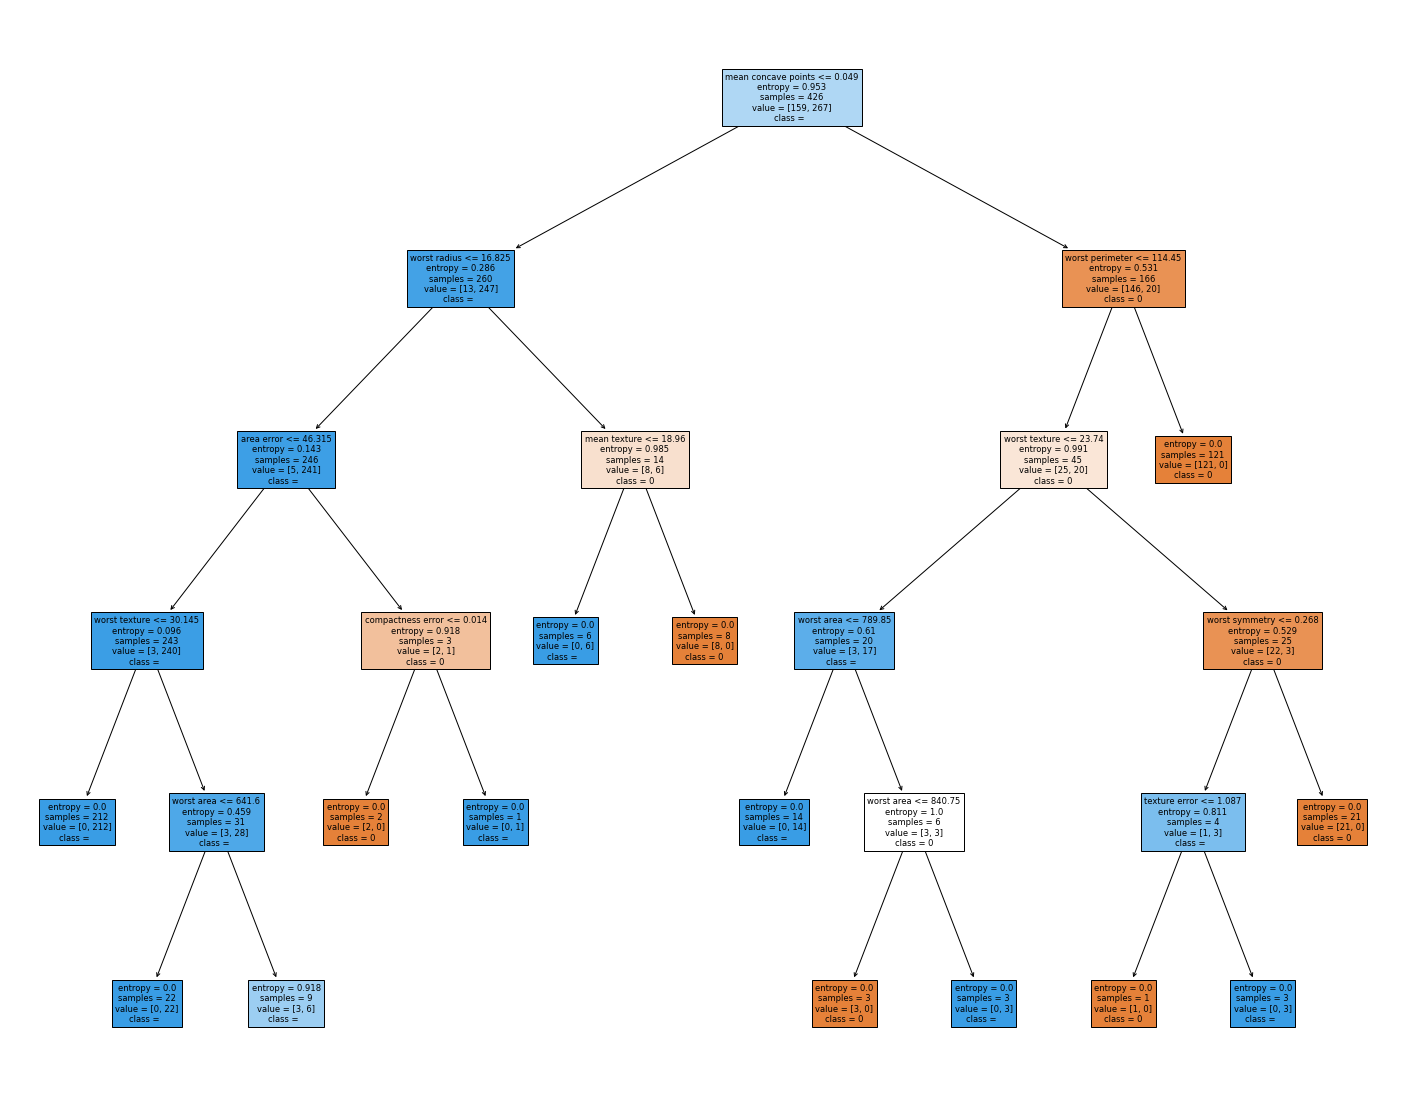

In [61]:
# Plot Classification Tree
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(model, feature_names = df_cancer.columns, class_names = str(data.target_names), filled = True)

In [3]:
# 用於資料與模型建構的函式庫匯入
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [63]:
# 資料集的讀取
cancer = load_breast_cancer()

In [64]:
# 分為訓練資料與測試資料
# stratify通過分層提取
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

In [65]:
# 準備繪製圖形用的list
training_accuracy = []
test_accuracy = []

In [66]:
# 學習
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

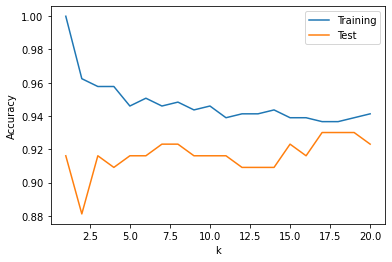

In [68]:
# 畫圖
plt.plot(range(1,21), training_accuracy, label = 'Training')
plt.plot(range(1,21), test_accuracy, label = 'Test')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.legend()

In [4]:
# 匯入
import requests
import io

# 取得資料
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 將取得的資料作為DataFrame物件讀取
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header = None)

# 在資料裡設定標籤
mushroom.columns = ['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
                    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
                    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

In [5]:
# 設定dummy variables
mushroom_dummy = pd.get_dummies(mushroom.iloc[:,range(1,23)])

# 目標變數0/1化
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)

In [11]:
# 資料分割
X = mushroom_dummy.drop('flg', axis = 1)
y = mushroom_dummy['flg']

# 分為訓練資料與測試資料
# stratify通過分層提取
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

# 準備繪製圖形用的list
training_accuracy = []
test_accuracy = []

In [12]:
# 學習
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

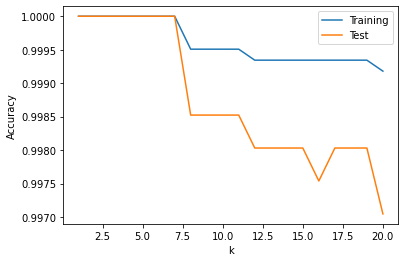

In [13]:
# 畫圖
plt.plot(range(1,21), training_accuracy, label = 'Training')
plt.plot(range(1,21), test_accuracy, label = 'Test')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.legend()